In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

%matplotlib inline
data_path = 'data'

In [14]:
transactions = pd.read_csv(os.path.join(data_path, 'sales_train.csv'))
items = pd.read_csv(os.path.join(data_path, 'items.csv'))
shops = pd.read_csv(os.path.join(data_path, 'shops.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [15]:
print(transactions.shape, test.shape)

(2935849, 6) (214200, 3)


In [20]:
transactions['date_format'] = pd.to_datetime(transactions.date,format='%d.%m.%Y')

In [21]:
transactions

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_format
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,2015-10-10
2935845,09.10.2015,33,25,7460,299.00,1.0,2015-10-09
2935846,14.10.2015,33,25,7459,349.00,1.0,2015-10-14
2935847,22.10.2015,33,25,7440,299.00,1.0,2015-10-22


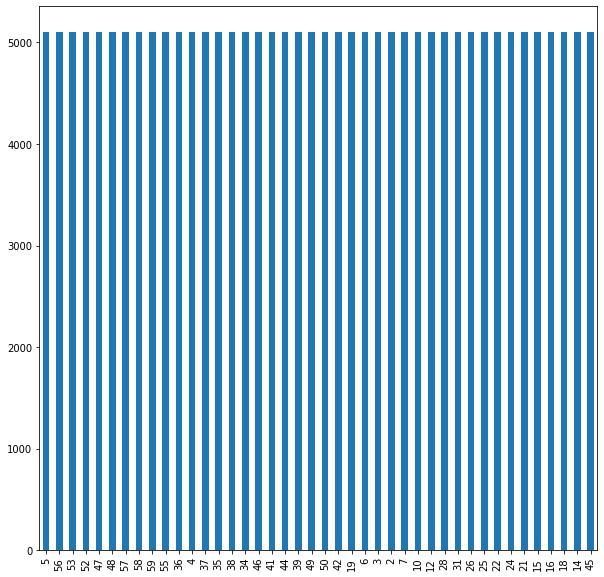

In [39]:
plt.figure(figsize=(10,10))
test.shop_id.value_counts().plot(kind='bar')

In [61]:
shops_not_included_in_test=[i for i in range(60) if i not in test.shop_id.value_counts()   ]

In [64]:
shops_not_included_in_test

[0, 1, 8, 9, 11, 13, 17, 20, 23, 27, 29, 30, 32, 33, 40, 43, 51, 54]

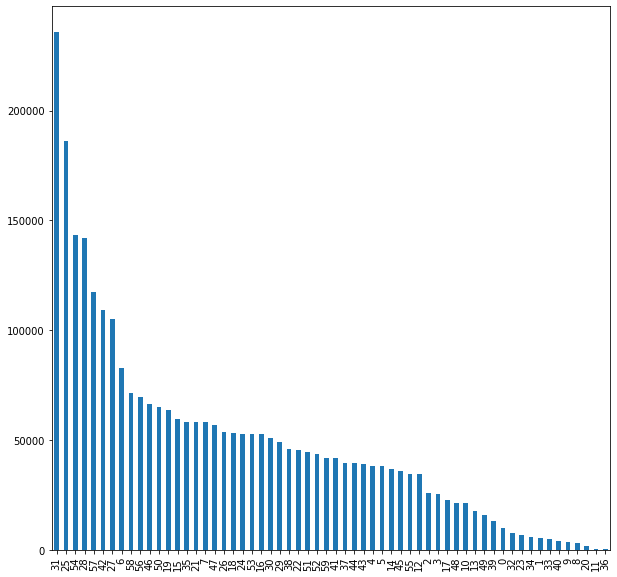

In [60]:
plt.figure(figsize=(10,10))
transactions.shop_id.value_counts().plot(kind='bar')

In [65]:
shops_not_included_in_train=[i for i in range(60) if i not in transactions.shop_id.value_counts()   ]

In [66]:
shops_not_included_in_train

[]

In [76]:
duplicate = transactions[transactions.duplicated(['date','shop_id','item_id'], keep=False)]
(duplicate)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_format
6959,29.01.2013,0,25,12133,889.00,1.0,2013-01-29
6960,29.01.2013,0,25,12133,1389.00,1.0,2013-01-29
70686,25.01.2013,0,31,14050,349.00,1.0,2013-01-25
70718,25.01.2013,0,31,14050,248.00,1.0,2013-01-25
76961,05.01.2013,0,54,20130,149.00,1.0,2013-01-05
76962,05.01.2013,0,54,20130,149.00,1.0,2013-01-05
103461,27.01.2013,0,38,15702,549.00,1.0,2013-01-27
103463,27.01.2013,0,38,15702,149.00,-1.0,2013-01-27
142696,18.02.2013,1,16,15702,149.00,1.0,2013-02-18
142697,18.02.2013,1,16,15702,549.00,1.0,2013-02-18


In [129]:
duplicate = test[test.duplicated(['shop_id','item_id'], keep=False)]
(duplicate)

,ID,shop_id,item_id


In [91]:
len([i for i in test.item_id.value_counts().index if i not in transactions.item_id.value_counts().index])

363

In [130]:
len([i for i in transactions.item_id.value_counts().index if i not in test.item_id.value_counts().index])

17070

In [86]:
transactions.item_id.value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
579          1
19388        1
19326        1
6992         1
7640         1
Name: item_id, Length: 21807, dtype: int64

In [89]:
transactions.item_id.value_counts().index

Int64Index([20949,  5822, 17717,  2808,  4181,  7856,  3732,  2308,  4870,
             3734,
            ...
              447,  7012,   121,   123,   124,   579, 19388, 19326,  6992,
             7640],
           dtype='int64', length=21807)

In [87]:
test.item_id.value_counts()

5037     42
17184    42
15764    42
15760    42
15673    42
         ..
13397    42
14126    42
14064    42
14151    42
969      42
Name: item_id, Length: 5100, dtype: int64

In [92]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_format
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [93]:
transactions.item_cnt_day.describe()

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

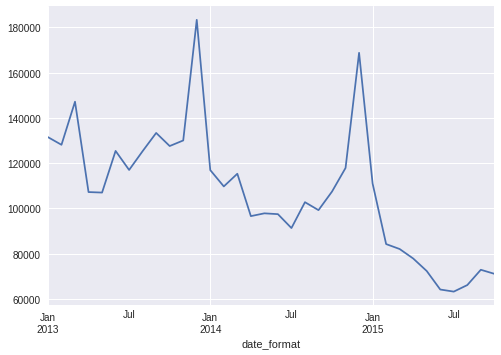

In [107]:
plt.style.use('seaborn')
transactions.copy().set_index('date_format').item_cnt_day.resample('M').sum().plot()


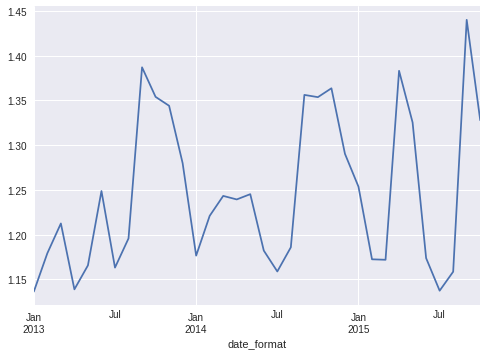

In [108]:
plt.style.use('seaborn')
transactions.copy().set_index('date_format').item_cnt_day.resample('M').mean().plot()


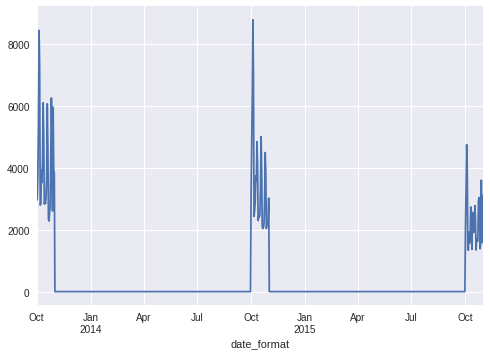

In [127]:
transactions.loc[transactions['date_block_num']%12 == 9].set_index('date_format').item_cnt_day.resample('D').sum().plot()

(0.0, 3.0)

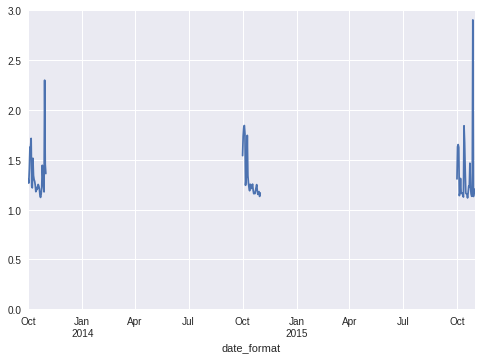

In [123]:
transactions.loc[transactions['date_block_num']%12 == 9].set_index('date_format').item_cnt_day.resample('D').mean().plot()
plt.ylim(0,3.0)